In [3]:
import random

In [4]:
# Load the list of possible words from the file
with open('../Dataset/reduced_possible_words.txt', 'r') as file:
    possible_words = [line.strip() for line in file]

# Load the list of words for testing from the file
with open('../Dataset/prev_words_chr.txt', 'r') as file:
    testing_set = [line.strip() for line in file]

In [5]:
# Define feedback symbols
MISS = "⬛"
MISPLACED = "🟨"
EXACT = "🟩"

In [6]:
# Function to evaluate a guess based on feedback
def evaluate_guess(secret_word, guess):
    guess_copy = guess
    feedback = []
    remaining_secret_letters = list(secret_word)
    # First, check exact matches (greens)
    for i, (g1, g2) in enumerate(zip(secret_word, guess_copy)):
        if g1 == g2:
            feedback.append("🟩")
            remaining_secret_letters.remove(g1)
            guess_copy = guess_copy[:i] + "🟩" + guess_copy[i+1:]
        else:
            feedback.append("⬛")
    feedback_str = "".join(feedback)
    # Then, check letters but not in location (yellows)
    for i, g2 in enumerate(guess_copy):
        if g2 in remaining_secret_letters:
            feedback_str = feedback_str[:i] + "🟨" + feedback_str[i+1:]
            remaining_secret_letters.remove(g2)
    feedback = feedback_str
    return "".join(feedback)

In [7]:
# Function to generate a random word from the list of possible words
def choose_random_word(list):
    word = random.choice(possible_words)
    while word in list: word = random.choice(possible_words)
    return word

In [8]:
# Bayesian algorithm for word selection
def bayesian_choose_word(possible_words, previous_guesses):
    scores = {word: 0 for word in possible_words}
    for word in possible_words:
        for guess, feedback in previous_guesses:
            guess_feedback = evaluate_guess(word, guess)
            if guess_feedback == feedback:
                scores[word] += 1
    best_words = [word for word, score in scores.items() if score == max(scores.values())]
    return random.choice(best_words)

In [9]:
#  Training phase
training_set_size = 1000  # Adjust as needed
training_set = []
training_set = [choose_random_word(training_set) for _ in range(training_set_size)]
training_attempts = []

great_starting_word = []
great_starting_word_attempts = float('inf')

word = 0
the_word = None

# with open('best_words.txt', 'r') as file:
#     best_initial_words = [line.strip() for line in file]
best_initial_words = ['often']

counter = 0
for element in best_initial_words:    
    initial_guess = best_initial_words[counter]
    print(f"Initial Guess: {initial_guess}")
    for target_word in training_set:
        attempts = 1
        previous_guesses = [(initial_guess, evaluate_guess(target_word, initial_guess))]
        word += 1
        print(f"word #{word}: {target_word}")
        while True:
            guess = bayesian_choose_word(possible_words, previous_guesses)
            attempts += 1
            if attempts == 1:
                the_word = guess
            # elif attempts == 2:
            #     the_word = guess
            
            feedback = evaluate_guess(target_word, guess)
            previous_guesses.append((guess, feedback))
            if target_word == guess:
                print(f"attempt: {attempts}")
                training_attempts.append(attempts)
                
                if attempts < 3:
                    great_starting_word.append(the_word)
                    # great_starting_word_attempts = attempts
                break
    counter += 1        
    

Initial Guess: often
word #1: pulpy
attempt: 5
word #2: slosh
attempt: 4
word #3: vapor
attempt: 4
word #4: aglow
attempt: 4
word #5: ester
attempt: 4
word #6: after
attempt: 2
word #7: femme
attempt: 3
word #8: windy
attempt: 6
word #9: winch
attempt: 4
word #10: shave
attempt: 4
word #11: boule
attempt: 4
word #12: fizzy
attempt: 5
word #13: pesky
attempt: 4
word #14: ruler
attempt: 5
word #15: block
attempt: 5
word #16: chaos
attempt: 4
word #17: scoff
attempt: 3
word #18: cyber
attempt: 5
word #19: pecan
attempt: 3
word #20: juicy
attempt: 5
word #21: elbow
attempt: 4
word #22: squib
attempt: 5
word #23: flank
attempt: 4
word #24: swamp
attempt: 5
word #25: exert
attempt: 4
word #26: orbit
attempt: 2
word #27: tenet
attempt: 3
word #28: stout
attempt: 4
word #29: feign
attempt: 3
word #30: grasp
attempt: 6
word #31: score
attempt: 5
word #32: gonad
attempt: 3
word #33: shawl
attempt: 4
word #34: manic
attempt: 4
word #35: heave
attempt: 4
word #36: refit
attempt: 3
word #37: crisp


In [10]:
# Testing phase
testing_attempts = []
word = 0
the_word = None
feedback = []
best_starting_word = []
best_starting_word_attempts = float('inf')
# print(possible_words)

counter = 0
for element in best_initial_words:  
    initial_guess = best_initial_words[counter]
    print(f"Initial Guess: {initial_guess}")

    for target_word in testing_set:
        attempts = 1
        previous_guesses = [(initial_guess, evaluate_guess(target_word, initial_guess))]
        word += 1
        print(f"word #{word}: {target_word}")

        while True:
            attempts += 1
            guess = bayesian_choose_word(possible_words, previous_guesses)
            # print(guess)
            if attempts == 1:
                # guess = random.choice(great_starting_word)
                the_word = guess
            # elif attempts == 2:
            #     the_word = guess
            
            feedback = evaluate_guess(target_word, guess)
            previous_guesses.append((guess, feedback))
            if target_word == guess:
                print(f"attempt: {attempts}")
                testing_attempts.append(attempts)
                if attempts < 3:
                    best_starting_word.append(the_word)
                    # best_starting_word_attempts = attempts
                break
    counter += 1

Initial Guess: often
word #1: noise
attempt: 4
word #2: bleak
attempt: 4
word #3: grail
attempt: 5
word #4: phony
attempt: 4
word #5: mason
attempt: 4
word #6: noble
attempt: 3
word #7: pique
attempt: 4
word #8: retry
attempt: 4
word #9: cause
attempt: 4
word #10: tempo
attempt: 3
word #11: given
attempt: 5
word #12: smirk
attempt: 4
word #13: occur
attempt: 3
word #14: splat
attempt: 4
word #15: mercy
attempt: 5
word #16: adult
attempt: 4
word #17: graph
attempt: 4
word #18: leaky
attempt: 5
word #19: agent
attempt: 4
word #20: uncle
attempt: 4
word #21: knelt
attempt: 4
word #22: skunk
attempt: 5
word #23: snail
attempt: 3
word #24: truth
attempt: 6
word #25: binge
attempt: 3
word #26: viola
attempt: 4
word #27: chime
attempt: 4
word #28: bunch
attempt: 5
word #29: spurt
attempt: 5
word #30: while
attempt: 5
word #31: merry
attempt: 5
word #32: beret
attempt: 3
word #33: daddy
attempt: 4
word #34: azure
attempt: 4
word #35: coach
attempt: 5
word #36: smile
attempt: 5
word #37: loyal


In [11]:
# Print average attempts for training and testing
avg_training_attempts = sum(training_attempts) / len(training_attempts)
avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)

print(f"Average attempts during training: {avg_training_attempts:.2f}")
print(f"Average attempts during testing: {avg_testing_attempts:.2f}")

Average attempts during training: 4.01
Average attempts during testing: 4.02


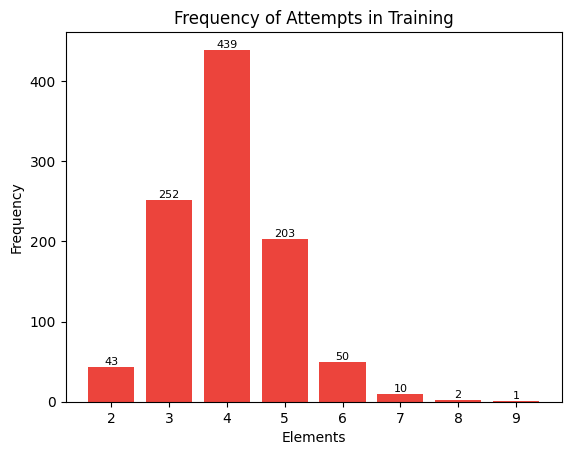

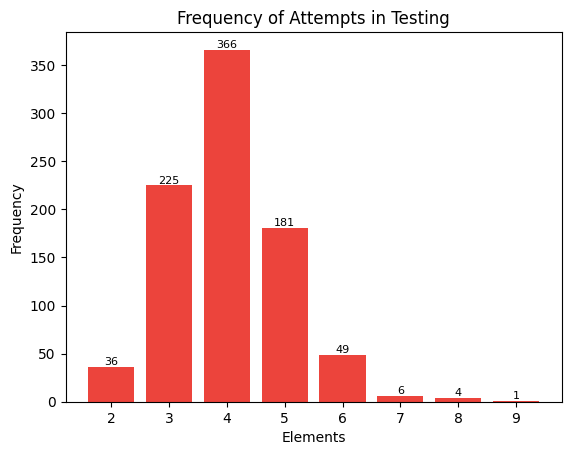

In [18]:
import matplotlib.pyplot as plt

unique_elements, counts = [], []

for item in set(training_attempts):
    unique_elements.append(item)
    counts.append(training_attempts.count(item))

# Create a bar graph
bars = plt.bar(unique_elements, counts, color='#ec443c')
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=8)

# Add data labels
# for i, count in enumerate(counts):
#     plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Training')

# Show the plot
plt.show()

unique_elements, counts = [], []

for item in set(testing_attempts):
    unique_elements.append(item)
    counts.append(testing_attempts.count(item))

# Create a bar graph
bars = plt.bar(unique_elements, counts, color='#ec443c')
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=8)

# Add data labels
# for i, count in enumerate(counts):
#     plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Testing')

# Show the plot
plt.show()

In [13]:
# Main game loop
attempts = 0
previous_guesses = []

print("Let's Play Wordle!")
print("Please think of a word and provide feedback as follows:")
print("0 for MISS, 1 for MISPLACED, and 2 for EXACT.")

while True:
    attempts += 1
    guess = bayesian_choose_word(possible_words, previous_guesses)
    
    # First step to set the first word
    if attempts == 1: guess = random.choice(great_starting_word)
    
    feedback = []
    while True:
        try:
            feedback_input = input(f"Attempt {attempts}: {guess} - Enter feedback (0/1/2): ")
            feedback_input = [int(f) for f in feedback_input]
            if all(f in [0, 1, 2] for f in feedback_input) and len(feedback_input) == 5:
                for i in range(len(feedback_input)):
                    if feedback_input[i] == 0:
                        feedback.append("⬛")
                    elif feedback_input[i] == 1:
                        feedback.append("🟨")
                    elif feedback_input[i] == 2:
                        feedback.append("🟩")
            else:
                print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        except ValueError:
            print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        if len(feedback) == len(feedback_input):
            feedback = "".join(feedback)
            break
    previous_guesses.append((guess, feedback))
    print(feedback)

    if feedback.count("🟩") == 5:
        print(f"Congratulations! The word was '{guess}'. It took {attempts} attempts to guess.")
        break

Let's Play Wordle!
Please think of a word and provide feedback as follows:
0 for MISS, 1 for MISPLACED, and 2 for EXACT.
Invalid feedback. Please provide feedback as 0, 1, or 2.



TypeError: 'NoneType' object is not iterable